<a href="https://www.kaggle.com/code/suyashkapil/drug-classification?scriptVersionId=118443161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing Libraries**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **Importing Dataset**

In [71]:
drug =  pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [72]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [73]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No Null Values

# **Data Visualization**

Sex
F     96
M    104
Name: Drug, dtype: int64


([<matplotlib.patches.Wedge at 0x7f315b64c6d0>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Female'),
  Text(-0.06906971127148541, -1.0978293924762963, 'Male')],
 [Text(0.03767433190106138, 0.598816035787126, '48%'),
  Text(-0.03767438796626476, -0.598816032259798, '52%')])

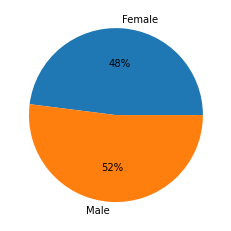

In [74]:
drug_sex = drug.groupby('Sex').count()['Drug']
print(drug_sex)
plt.pie(drug_sex , labels = ['Female','Male'], autopct = '%0.0f%%')

BP
HIGH      77
LOW       64
NORMAL    59
Name: Drug, dtype: int64


([<matplotlib.patches.Wedge at 0x7f315b5a1c90>,
 [Text(0.3888223589862547, 1.0289884222635182, 'HIGH'),
  Text(-1.0563230795297933, -0.3068901296110612, 'LOW'),
  Text(0.660462119378317, -0.8796532208014144, 'NORMAL')],
 [Text(0.21208492308341165, 0.5612664121437371, '38%'),
  Text(-0.576176225198069, -0.1673946161514879, '32%'),
  Text(0.3602520651154456, -0.4798108477098623, '29%')])

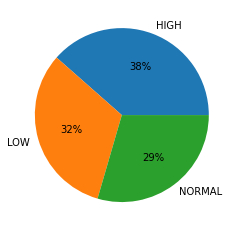

In [75]:
drug_bp = drug.groupby('BP').count()['Drug']
print(drug_bp)
plt.pie(drug_bp , labels = drug_bp.index , autopct = '%0.0f%%')

Cholesterol
HIGH      103
NORMAL     97
Name: Drug, dtype: int64


([<matplotlib.patches.Wedge at 0x7f315b588c50>,
 [Text(-0.05181704640055811, 1.09877886478687, 'HIGH'),
  Text(0.05181704640055798, -1.09877886478687, 'NORMAL')],
 [Text(-0.02826384349121351, 0.5993339262473836, '51%'),
  Text(0.028263843491213442, -0.5993339262473836, '49%')])

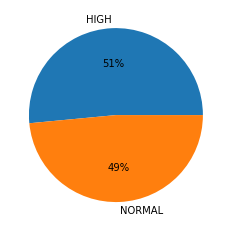

In [76]:
drug_chol = drug.groupby('Cholesterol').count()['Drug']
print(drug_chol)
plt.pie(drug_chol , labels = drug_chol.index , autopct = '%0.0f%%')

Text(0.5, 1.0, 'Drug by Age')

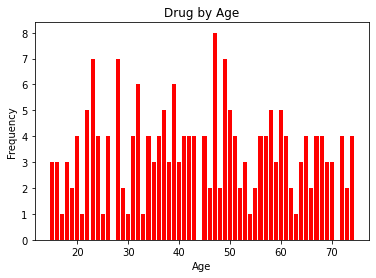

In [77]:
drug_age = drug.groupby('Age').count()['Drug']
plt.bar(x = drug_age.index , height = drug_age ,color = 'r')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Drug by Age')

In [78]:
top_age = drug_age.sort_values(ascending = False).head(10)
ta =pd.DataFrame(top_age)
ta1 = ta.drop(columns=['Drug'])
ta1['Frequency']= top_age
ta1

,Frequency
Age,
47,8
49,7
23,7
28,7
39,6
32,6
50,5
37,5
22,5


In [79]:
print('Average Age : ', np.mean(drug['Age']))

Average Age :  44.315


In [80]:
sod_pot = drug.sort_values(by = 'Na_to_K', ascending = False)
sod_pot

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
96,58,F,LOW,HIGH,38.247,DrugY
184,18,F,HIGH,HIGH,37.188,DrugY
98,20,M,HIGH,NORMAL,35.639,DrugY
188,65,M,HIGH,NORMAL,34.997,DrugY
194,46,F,HIGH,HIGH,34.686,DrugY
...,...,...,...,...,...,...
35,46,M,NORMAL,NORMAL,7.285,drugX
152,55,M,NORMAL,NORMAL,7.261,drugX
193,72,M,LOW,HIGH,6.769,drugC
111,47,F,NORMAL,NORMAL,6.683,drugX


Text(0.5, 1.0, 'Sodium to Potassium ratio')

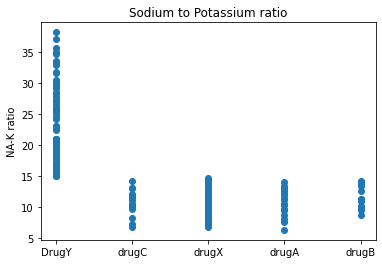

In [81]:
plt.scatter(x = drug['Drug'],y = drug['Na_to_K'] )
plt.ylabel('NA-K ratio')
plt.title('Sodium to Potassium ratio')

DrugY mostly contains higher Sodium to Potassium ratio

# **Applying Machine Learning Model**

In [82]:
drug.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [83]:
drug_fact = pd.DataFrame(drug['Age'], index = np.arange(0,200,1))
for column in drug :
    if drug[column].dtype == 'object':
        drug_fact[column] = pd.factorize(drug[column])[0]
drug_fact['Na_to_K'] = drug['Na_to_K']
drug_fact

,Age,Sex,BP,Cholesterol,Drug,Na_to_K
0,23,0,0,0,0,25.355
1,47,1,1,0,1,13.093
2,47,1,1,0,1,10.114
3,28,0,2,0,2,7.798
4,61,0,1,0,0,18.043
...,...,...,...,...,...,...
195,56,0,1,0,1,11.567
196,16,1,1,0,1,12.006
197,52,1,2,0,2,9.894
198,23,1,2,1,2,14.020


<AxesSubplot:>

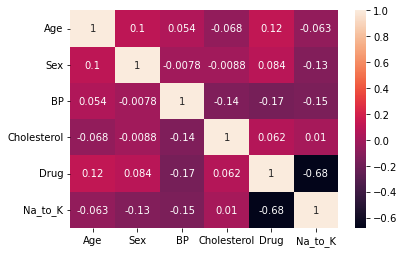

In [84]:
sns.heatmap(drug_fact.corr(), annot= True)

In [85]:
x =  drug_fact.drop(columns = ['Drug'])
y = drug_fact['Drug']
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [86]:
model = knn()
train = model.fit(x_train , y_train)
pred = train.predict(x_test)
pred

array([1, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 1, 0, 1, 4, 0, 3, 0, 0, 1, 0, 2,
       0, 0, 3, 1, 2, 0, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 0, 3])

In [87]:
score = accuracy_score(pred, y_test)
print('accuracy score (%) : ', score*100)

accuracy score (%) :  75.0


In [88]:
print('correct predictions : ', 40*score , 'out of 40' )

correct predictions :  30.0 out of 40
